## 1.1 Import Data and Required Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
print("completed")

completed


In [9]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y variables

In [11]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"] / 3

In [12]:
X = df.drop(columns=["average"], axis=1)

In [13]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [14]:
y = df["average"]

In [15]:
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: average, dtype: float64

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [19]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [20]:
X = preprocessor.fit_transform(X)

In [21]:
X.shape

(1000, 21)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 21), (200, 21))

Create an Evaluate Function to give all metrics after model Training

In [29]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [25]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [37]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='r2', n_jobs=-1, 
                                                            train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')
    
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Model: Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000




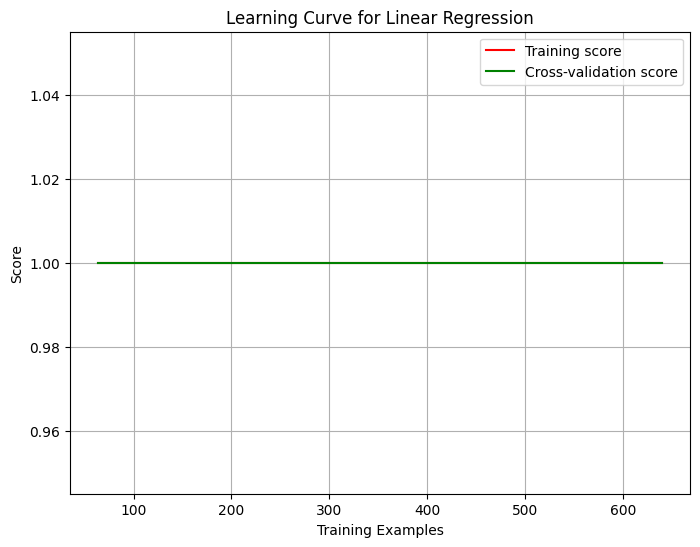

Model: Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.8075
- R2 Score: 0.9949
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9948




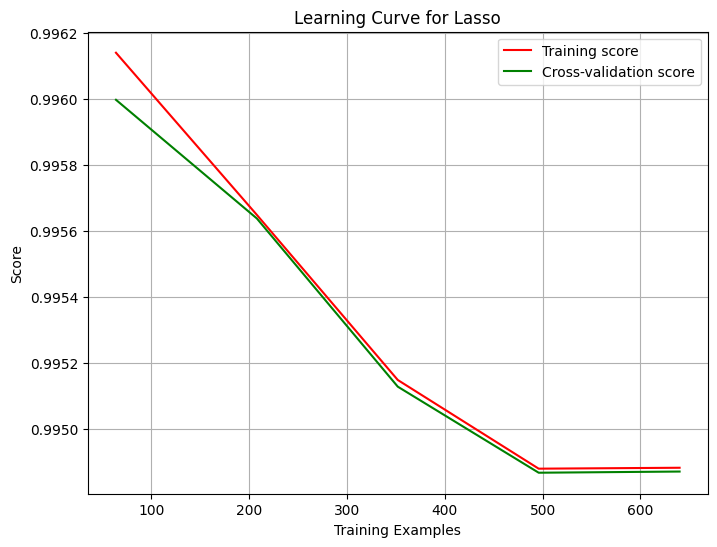

Model: Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0059
- Mean Absolute Error: 0.0048
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0064
- Mean Absolute Error: 0.0049
- R2 Score: 1.0000




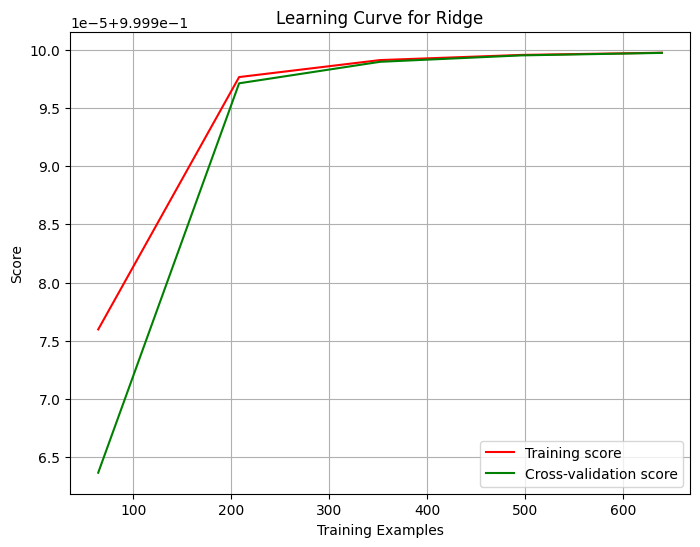

Model: K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.9816
- Mean Absolute Error: 1.5570
- R2 Score: 0.9803
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.6661
- Mean Absolute Error: 1.9230
- R2 Score: 0.9668




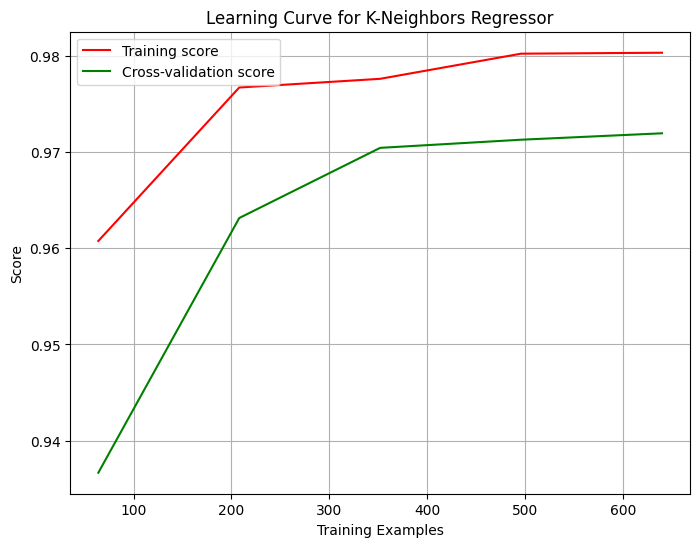

Model: Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7226
- Mean Absolute Error: 0.1133
- R2 Score: 0.9976




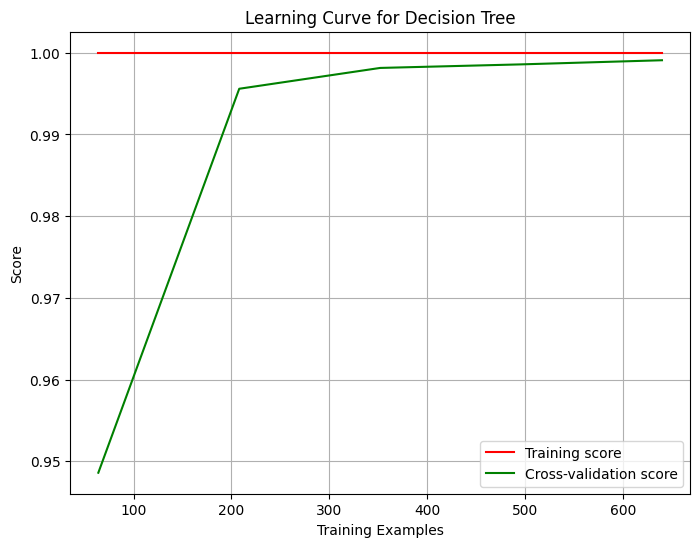

Model: Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1340
- Mean Absolute Error: 0.0254
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9172
- Mean Absolute Error: 0.1164
- R2 Score: 0.9961




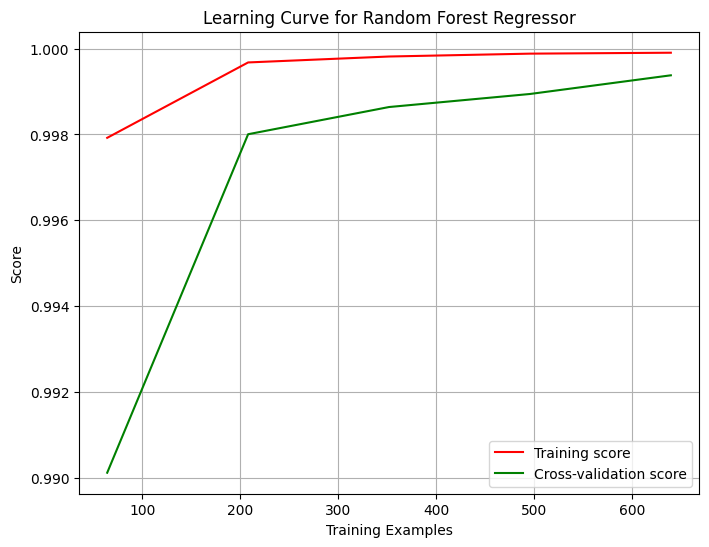

Model: XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0122
- Mean Absolute Error: 0.0083
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.7421
- Mean Absolute Error: 0.1759
- R2 Score: 0.9974




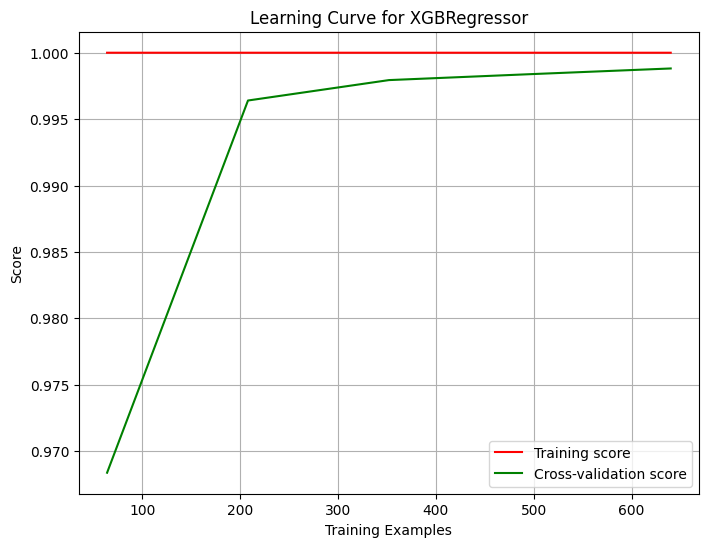

Model: CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1285
- Mean Absolute Error: 0.1036
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0393
- Mean Absolute Error: 0.3138
- R2 Score: 0.9950




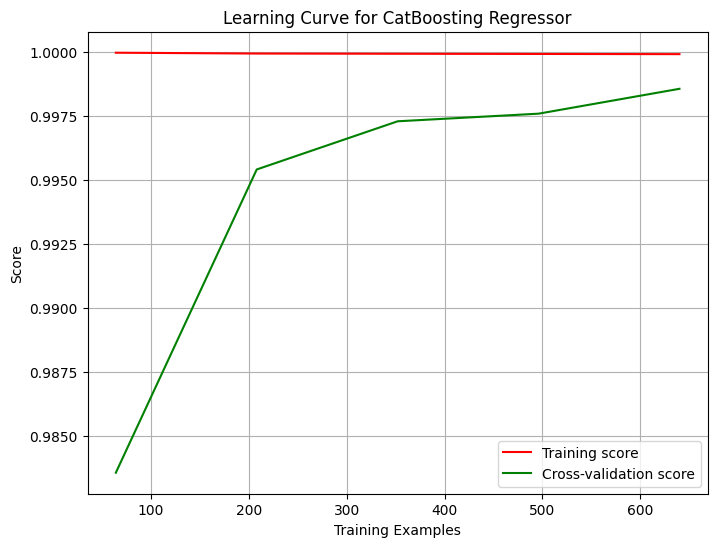

Model: AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 1.2056
- Mean Absolute Error: 0.9911
- R2 Score: 0.9927
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.5254
- Mean Absolute Error: 1.0910
- R2 Score: 0.9891




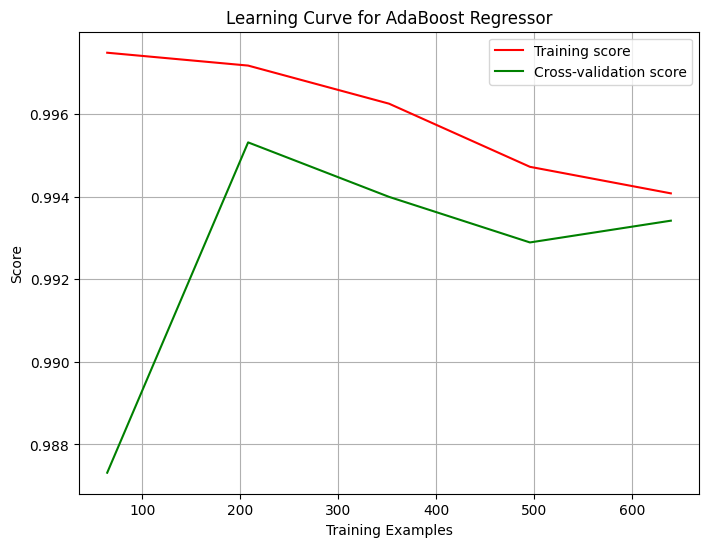

In [38]:
for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]
    
    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Evaluate the model
    model_train_mae, model_train_rmse, model_train_r2 = evaluate(y_train, train_predict)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate(y_test, test_predict)

    # Print performance metrics
    print(f"Model: {model_name}")
    model_list.append(model_name)
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    
    # Plot the learning curve for the current model
    plot_learning_curve(model, X_train, y_train, model_name)

In [34]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
9,Linear Regression,1.000000
2,Ridge,1.000000
11,Ridge,1.000000
4,Decision Tree,0.997870
13,Decision Tree,0.997600
6,XGBRegressor,0.997431
15,XGBRegressor,0.997431
14,Random Forest Regressor,0.996323
5,Random Forest Regressor,0.995964
